In [66]:
!pip install statsmodels

  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)


In [249]:
import ta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [145]:
from transform import log_and_difference, difference, max_min_normalize, mean_normalize

In [113]:
from statsmodels.tsa.stattools import adfuller

# https://machinelearningmastery.com/time-series-data-stationary-python/
def test_stationary(series):
    result = adfuller(series.values[1:], autolag="AIC")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    return result

In [389]:
training_data_path = 'data/sine-up-15m-btc-usdt.csv'
training_data_path = 'data/sine-fixed-15m-btc-usdt.csv'
#training_data_path = 'data/binance-15m-btc-usdt.csv'
df = pd.read_csv(training_data_path)
df.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
df['date'] = pd.to_datetime(df['date'])

In [104]:
amp = 50
offset = 100

In [71]:
amp = 1000
offset = 35000

In [83]:
x = np.arange(0, 2 * np.pi, 2 * np.pi / 1001)
y = amp * np.sin(3 * x) + offset

df = pd.DataFrame()
df['close'] = y

In [390]:
df

,date,open,high,low,close,volume
0,2021-03-01 00:00:00,35000.000000,35004.52,34862.89,35000.000000,360.829789
1,2021-03-01 00:15:00,35000.000000,35321.81,34924.01,35037.546059,444.194401
2,2021-03-01 00:30:00,35037.546059,35245.11,34712.08,35075.087797,1681.385710
3,2021-03-01 00:45:00,35075.087797,35133.24,34797.06,35112.620894,1658.398344
4,2021-03-01 01:00:00,35112.620894,35367.45,34897.52,35150.141031,525.009075
...,...,...,...,...,...,...
5852,2021-04-30 23:00:00,34774.874848,35093.46,34611.74,34812.356111,1473.074458
5853,2021-04-30 23:15:00,34812.356111,35040.11,34746.02,34849.858969,404.187560
5854,2021-04-30 23:30:00,34849.858969,34958.71,34611.91,34887.379106,1427.198419
5855,2021-04-30 23:45:00,34887.379106,35055.25,34729.67,34924.912203,1045.565271


In [415]:
df['sma10'] = sma_indicator(df['close'], 10, fillna=True)
df['sma50'] = sma_indicator(df['close'], 50, fillna=True)
df['sma100'] = sma_indicator(df['close'], 100, fillna=True)
df['ema25'] = ema_indicator(df['close'], 25, fillna=True)
df['ema50'] = ema_indicator(df['close'], 50, fillna=True)
df['ema120'] = ema_indicator(df['close'], 120, fillna=True)
df['ema_diff'] = df['ema25']-df['ema50']
df['ema_diff_norm'] = 1-df['ema50']/df['ema25']

In [416]:
df

,date,open,high,low,close,volume,sma10,sma50,sma100,ema25,ema50,ema120,ema_diff_norm,ema_diff
0,2021-03-01 00:00:00,35000.000000,35004.52,34862.89,35000.000000,360.829789,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,35000.000000,0.000000,0.000000
1,2021-03-01 00:15:00,35000.000000,35321.81,34924.01,35037.546059,444.194401,35018.773030,35018.773030,35018.773030,35002.888158,35001.472394,35000.620596,0.000040,1.415764
2,2021-03-01 00:30:00,35037.546059,35245.11,34712.08,35075.087797,1681.385710,35037.544619,35037.544619,35037.544619,35008.441977,35004.359273,35001.851459,0.000117,4.082704
3,2021-03-01 00:45:00,35075.087797,35133.24,34797.06,35112.620894,1658.398344,35056.313688,35056.313688,35056.313688,35016.455740,35008.604827,35003.682359,0.000224,7.850913
4,2021-03-01 01:00:00,35112.620894,35367.45,34897.52,35150.141031,525.009075,35075.079156,35075.079156,35075.079156,35026.739224,35014.155266,35006.103163,0.000359,12.583957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5852,2021-04-30 23:00:00,34774.874848,35093.46,34611.74,34812.356111,1473.074458,34644.091738,33923.771382,33159.597850,34373.567961,33967.751750,33289.524801,0.011806,405.816211
5853,2021-04-30 23:15:00,34812.356111,35040.11,34746.02,34849.858969,404.187560,34681.445736,33959.088841,33189.533720,34410.205731,34002.344190,33315.315448,0.011853,407.861541
5854,2021-04-30 23:30:00,34849.858969,34958.71,34611.91,34887.379106,1427.198419,34718.836394,33994.526089,33219.677942,34446.911375,34037.051441,33341.299971,0.011898,409.859934
5855,2021-04-30 23:45:00,34887.379106,35055.25,34729.67,34924.912203,1045.565271,34756.259408,34030.079048,33250.027045,34483.680670,34071.869510,33367.475380,0.011942,411.811159


In [ ]:
def get_dataset(series_name, series, head=0):
    dataset = pd.DataFrame()
    if (head==0):
        dataset[series_name] = series
        dataset['price'] = df['close']
    else:
        dataset[series_name] = series.head(head)
        dataset['price'] = df['close'].head(head)
    
    dataset[series_name+'_diff'] = difference(dataset[series_name], inplace=False) 

    dataset[series_name+'_log_diff'] = log_and_difference(dataset[series_name], inplace=False)

    dataset[series_name+'_max_min_diff'] = max_min_normalize(dataset[series_name+'_diff'], inplace=False)
    dataset[series_name+'_mean_diff'] = mean_normalize(dataset[series_name+'_diff'], inplace=False)

    dataset[series_name+'_max_min'] = max_min_normalize(dataset[series_name], inplace=False)
    dataset[series_name+'_mean'] = mean_normalize(dataset[series_name], inplace=False)

    dataset[series_name+'_diff_max_min'] = difference(dataset[series_name+'_max_min'], inplace=False)
    dataset[series_name+'_diff_mean'] = difference(dataset[series_name+'_mean'], inplace=False)
    
    return dataset

In [425]:
head = 1000
series_name = 'price'
series = df['close']
series_name = 'ema_diff_norm'
series = df['ema_diff_norm']
dataset = get_dataset(series_name, series)
dataset2 = get_dataset(series_name, series, head)

#drop 1st row of record
#dataset = dataset.iloc[100:]
#dataset2 = dataset2.iloc[100:]

c:\git\dennislee\tensortrade-train\venv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\git\dennislee\tensortrade-train\venv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [426]:
def show_chart(column_name, dataset1, dataset2, head):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(column_name)

    dataset1['price'].plot(ax=axs[0], grid=True)
    dataset2['price'].plot(ax=axs[1], grid=True)

    axs[0].set_title("Full")
    axs[1].set_title(head)

    if column_name:
        dataset1[column_name].plot(secondary_y=True, grid=True, ax=axs[0])
        dataset2[column_name].plot(secondary_y=True, grid=True, ax=axs[1])

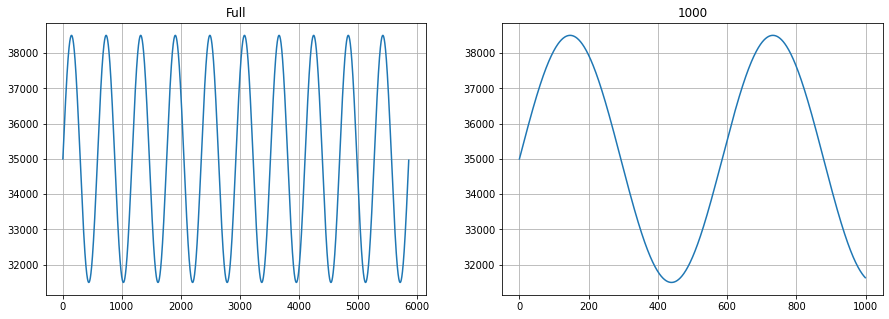

In [427]:
show_chart(None, dataset, dataset2, head)

<AxesSubplot:>

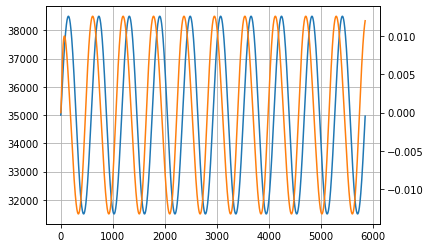

In [428]:
dataset['price'].plot(grid=True)
dataset[series_name].plot(grid=True, secondary_y=True)

<AxesSubplot:>

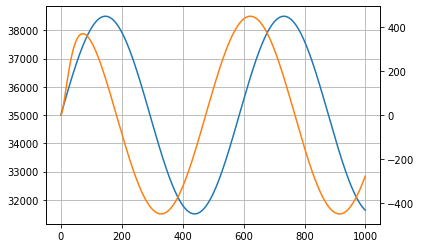

In [429]:
df['close'].head(1000).plot(grid=True)
df['ema_diff'].head(1000).plot(grid=True, secondary_y=True)
#df['ema_diff_norm'].head(1000).plot(grid=True, secondary_y=True)

<AxesSubplot:>

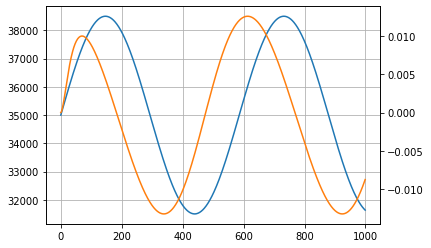

In [430]:
df['close'].head(1000).plot(grid=True)
#df['ema_diff'].head(1000).plot(grid=True, secondary_y=True)
df['ema_diff_norm'].head(1000).plot(grid=True, secondary_y=True)

0.0

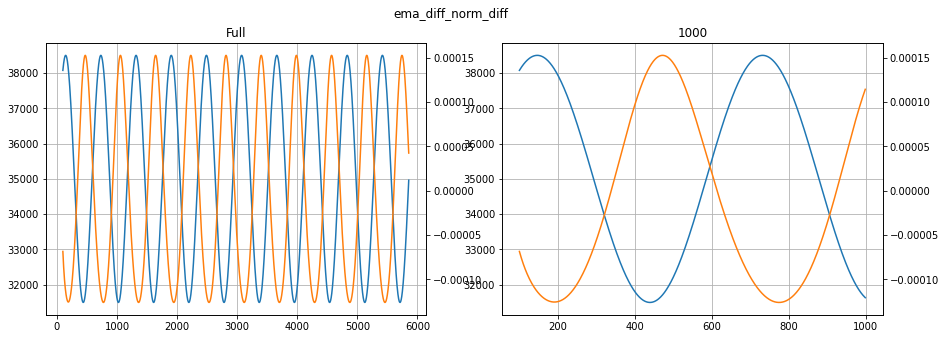

In [408]:
column_name = series_name+'_diff'
show_chart(column_name, dataset, dataset2, head)
dataset[column_name][head-1] - dataset2[column_name][head-1]

0.9097643719308497

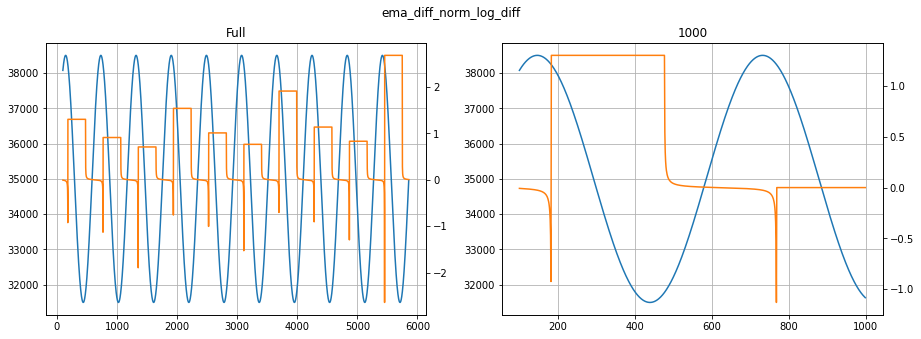

In [409]:
column_name = series_name+'_log_diff'
show_chart(column_name, dataset, dataset2, head)
dataset[column_name][head-1] - dataset2[column_name][head-1]

In [414]:
# column_name = series_name+'_max_min_diff'
# show_chart(column_name, dataset, dataset2, head)
# dataset[column_name][head-1] - dataset2[column_name][head-1]

-1.5617040438620222e-09

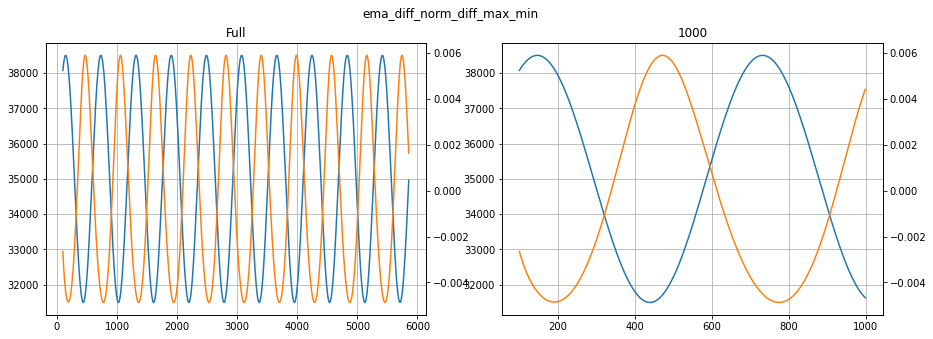

In [411]:
column_name = series_name+'_diff_max_min'
show_chart(column_name, dataset, dataset2, head)
dataset[column_name][head-1] - dataset2[column_name][head-1]

-0.08894447667236349

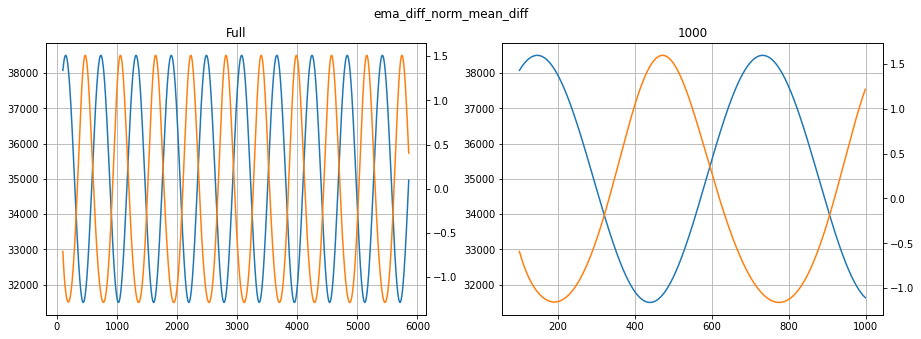

In [412]:
column_name = series_name+'_mean_diff'
show_chart(column_name, dataset, dataset2, head)
dataset[column_name][head-1] - dataset2[column_name][head-1]

-0.0001411368404989899

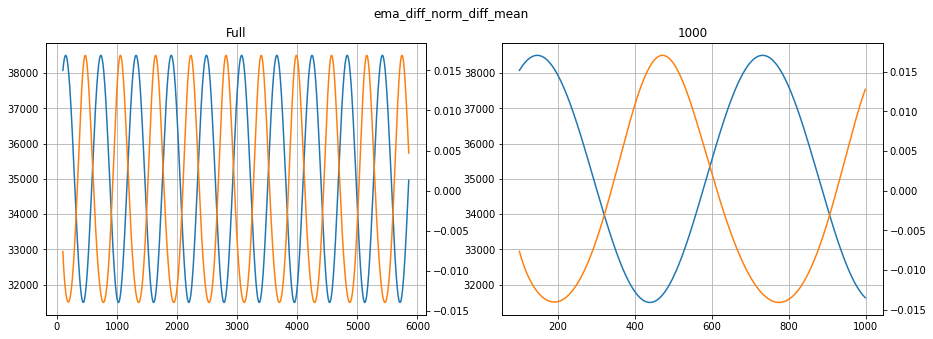

In [413]:
column_name = series_name+'_diff_mean'
show_chart(column_name, dataset, dataset2, head)
dataset[column_name][head-1] - dataset2[column_name][head-1]

0.0

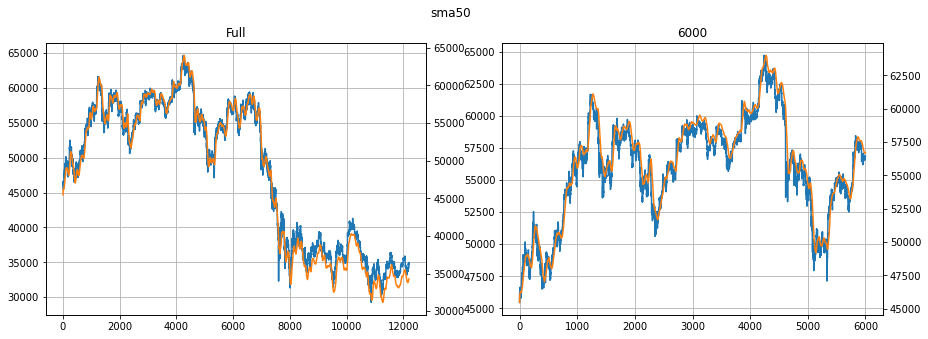

In [316]:
column_name = 'sma50'
show_chart(column_name, dataset, dataset2, head)
dataset[column_name][head-1] - dataset2[column_name][head-1]

In [164]:
test_stationary(dataset['price'])

ADF Statistic: -0.701993
p-value: 0.846233
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [165]:
test_stationary(dataset['price_log_diff'])

ADF Statistic: -28.649323
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [148]:
test_stationary(dataset['price_max_min_norm'])

ADF Statistic: -28.649323
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [141]:
test_stationary(dataset['sma10'])

ADF Statistic: -0.726364
p-value: 0.839802
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [142]:
test_stationary(dataset['sma50'])

ADF Statistic: -0.489559
p-value: 0.894038
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [143]:
test_stationary(dataset['sma100'])

ADF Statistic: -0.787134
p-value: 0.822872
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
